In [1]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset.csv',index_col=0)

In [3]:
cd ..

/home/ncp/workspace


In [4]:
cd data

/home/ncp/workspace/data


In [6]:
df1 = pd.read_csv('dataset_.csv',index_col=0)
df1

,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,orginal_png_file,crop_file,body_part_file,diagnosis
0,H05_00019_02,M,A1,0개월,NaN,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00019_02.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
1,H01_00716_01,F,A1,0개월,52.0,3.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H01_00716_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
2,H03_00172_01,F,A1,0개월,42.0,1.8,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00172_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
3,H05_00204_01,M,A1,0개월,50.5,3.0,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00204_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
4,H04_00178_01,F,A1,0개월,30.0,0.5,Diffuse hazziness in both lungs. ETT insertion...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00178_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
5,H04_00208_01,M,A1,0개월,30.5,0.6,ETT insertion state.\nUVC and UAC insertion st...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00208_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
6,H07_02617_01,F,A1,0개월,39.0,1.1,Area of bilateral ground glass lungs with air-...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H07_02617_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
7,H03_00329_01,F,A1,0개월,37.0,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00329_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
8,H03_00130_01,M,A1,0개월,40.0,1.4,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00130_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
9,H08_00179_01,M,A1,0개월,53.0,3.1,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H08_00179_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4


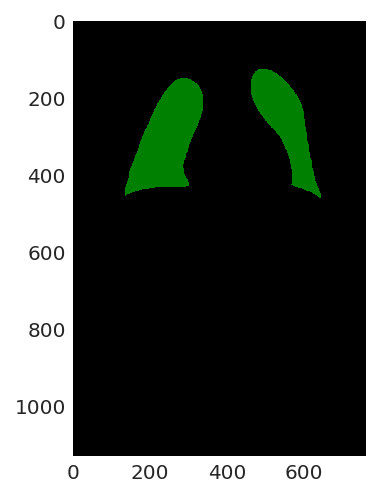

In [17]:
img = cv2.imread(df1.body_part_file[0])
plt.imshow(img)
# df1.orginal_png_file[2]


In [18]:
def dcm2png(x):
    x = x.replace('dcm','png')
    return x

In [25]:
df1['orginal_png_file'] = df1['orginal_dcm_file'].apply(lambda x : dcm2png(x))

In [33]:
print(df1['orginal_dcm_file'][155])
print(df1['orginal_png_file'][155])

/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A1.0-2개월/H05_02381_01/org/H05_02381_01.dcm
/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A1.0-2개월/H05_02381_01/org/H05_02381_01.png


In [34]:
df1.to_csv('dataset_.csv')

In [35]:
df1

,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,orginal_png_file,crop_file,body_part_file,diagnosis
0,H05_00019_02,M,A1,0개월,NaN,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00019_02.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
1,H01_00716_01,F,A1,0개월,52.0,3.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H01_00716_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
2,H03_00172_01,F,A1,0개월,42.0,1.8,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00172_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
3,H05_00204_01,M,A1,0개월,50.5,3.0,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00204_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
4,H04_00178_01,F,A1,0개월,30.0,0.5,Diffuse hazziness in both lungs. ETT insertion...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00178_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
5,H04_00208_01,M,A1,0개월,30.5,0.6,ETT insertion state.\nUVC and UAC insertion st...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00208_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
6,H07_02617_01,F,A1,0개월,39.0,1.1,Area of bilateral ground glass lungs with air-...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H07_02617_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
7,H03_00329_01,F,A1,0개월,37.0,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00329_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
8,H03_00130_01,M,A1,0개월,40.0,1.4,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00130_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
9,H08_00179_01,M,A1,0개월,53.0,3.1,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H08_00179_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
